<a href="https://colab.research.google.com/github/jennyked/Customer-Churn-Analysis-Project-/blob/main/Customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from datetime import timedelta
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import io

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['churn.csv']))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.query

<bound method DataFrame.query of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL

In [6]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Question

1. What is the average tenure period for customers that stayed and those who left the company?

In [7]:
avg_tenure_period = df.groupby('Churn')[['tenure']].mean().round(1).sort_values(['tenure'], ascending = False)

In [8]:
avg_tenure_period

,tenure
Churn,
No,37.6
Yes,18.0


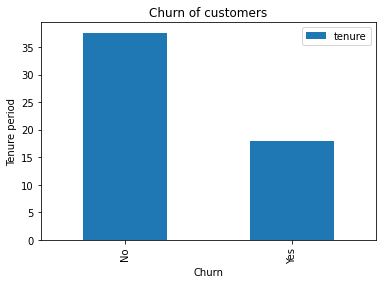

In [9]:
avg_tenure_period.plot.bar(ylabel = 'Tenure period', title = 'Churn of customers')

Conclusion

The average tenure period of customers that stayed is 37 days and the average tenure period for customers that left is 18 days

Question 

2. What services are preferred more by customers that stayed to those who left the company?


In [10]:
service_left = df.loc[df['Churn'] == 'Yes']

In [11]:
pref_service_left=service_left.InternetService.value_counts()

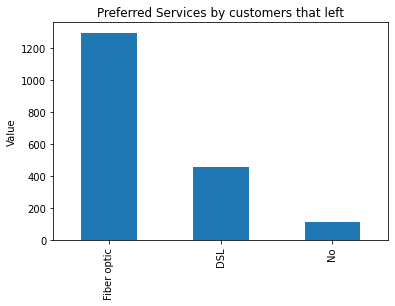

In [12]:
pref_service_left.plot.bar(title = 'Preferred Services by customers that left', ylabel = 'Value')

The preferred internet service by customers that left is Fibre optics

In [16]:
service_stay = df.loc[df['Churn'] == 'No']

In [17]:
pref_service_stay=service_stay.InternetService.value_counts()

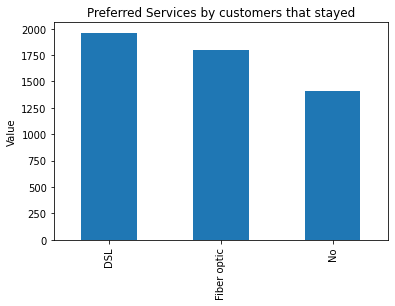

In [18]:
pref_service_stay.plot.bar(title = 'Preferred Services by customers that stayed', ylabel = 'Value')

The preferred internet service by customers that stayed is DSL, followed closely by fibre optics


3. What is distribution of Senior citizens and non senior citizen that left the company?

In [19]:
cust_left = df.query('Churn == "Yes"')

In [20]:
senior_yes = cust_left.SeniorCitizen.value_counts()


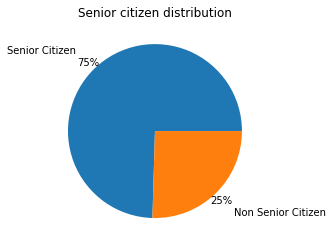

In [22]:
plt.pie(senior_yes, labels=['Senior Citizen', 'Non Senior Citizen'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('Senior citizen distribution')
plt.ylabel(' ')
plt.show()

Conclusion

The percentage of senior citizens that left the company is 75%, while the non senior citizen is 25%

4. What is the accumulative monthly charge of customers that left?


In [24]:
monthly_charge= cust_left.groupby('Churn')[['MonthlyCharges']].sum()
monthly_charge

,MonthlyCharges
Churn,
Yes,139130.85


In [25]:
fig = px.violin(cust_left['MonthlyCharges'], y="MonthlyCharges")
fig.show()

6. What is the preferred contract for the genders?

In [32]:
contract_type = df.groupby(['gender','Contract']).size()
contract_type

gender  Contract      
Female  Month-to-month    1925
        One year           718
        Two year           845
Male    Month-to-month    1950
        One year           755
        Two year           850
dtype: int64

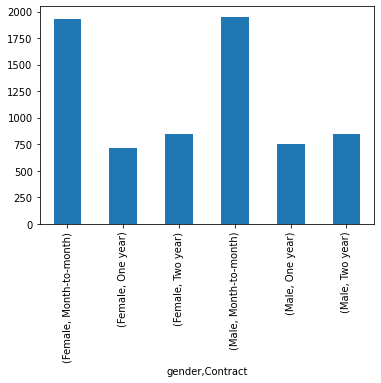

In [33]:
contract_type.plot.bar()